# Selección de características
Actividad Lección 4 || Programación Python para Machine Learning

Objetivos:
* Entender el concepto de selección de características y las razones para su aplicación.
* Aprender a aplicar métodos Filter para selección de características.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 09/11/2022

# Tabla de Contenidos
1. [Importes](#importes)
2. [Carga del dataset](#carga)
3. [Transformación de variables](#transformacion)
4. [Ranking de características](#ranking)
5. [Conclusiones](#conclusiones)

# Importes <a name="importes"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Carga del dataset <a name="carga"></a>
Se carga el dataset [Chess](https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King-Pawn%29) para trabajar la selección de características utilizando métodos Filter.

In [2]:
file = "kr-vs-kp.data"
col_names = ["bkblk", "bknwy", "bkon8", "bkona", "bkspr", "bkxbq", 
             "bkxcr", "bkxwp", "blxwp", "bxqsq", "cntxt", "dsopp", 
             "dwipd", "hdchk", "katri", "mulch", "qxmsq", "r2ar8", 
             "reskd", "reskr", "rimmx", "rkxwp", "rxmsq", "simpl", 
             "skach", "skewr", "skrxp", "spcop", "stlmt", "thrsk", 
             "wkcti", "wkna8", "wknck", "wkovl", "wkpos", "wtoeg", "class"]
df = pd.read_csv(file, names=col_names, index_col=False)
df.head()

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,class
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [3]:
input_data = df[df.columns[:-1]]
Y = df[df.columns[-1]]

# Transformación de variables <a name="transformacion"></a>
Al tratarse de un problema de clasificación donde las variables de entrada son categóricas, es necesario aplicar `OneHotEncoding` para poder trabajar con variables numéricas.

In [4]:
enc = OneHotEncoder(handle_unknown='ignore').fit(input_data)
input_data = pd.DataFrame(enc.transform(input_data).toarray(), columns=enc.get_feature_names_out())
input_data.head()

,bkblk_f,bkblk_t,bknwy_f,bknwy_t,bkon8_f,bkon8_t,bkona_f,bkona_t,bkspr_f,bkspr_t,...,wkna8_f,wkna8_t,wknck_f,wknck_t,wkovl_f,wkovl_t,wkpos_f,wkpos_t,wtoeg_n,wtoeg_t
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


# Ranking de caracteristicas <a class="anchor" id="ranking"></a>
Aplicando el método Filter de selección de características, se utilizarán los siguientes tests estadísticos sobre `SelectKBest` para la selección de características:
- Test Chi-cuadrado
- Información Mútua

Se utilizará una función `get_ranking` para obtener un `pandas.DataFrame` ordenando de mayor a menor la puntuación de cada característica tras aplicar cualquiera de los tests estadísticos mencionados anteriormente.

In [5]:
def get_ranking(data, Y, func, score_col):
    # Uso de SelectKBest
    filterKB = SelectKBest(func).fit(data, Y)
    #Creación de Ranking a partir del score de cada característica
    df_rank = pd.DataFrame(filterKB.scores_, index=data.columns, columns=[score_col])
    # Creación de columna 'feature' para agrupar las características tras aplicar OneHotEncoding
    df_rank['feature'] = df_rank.index.str.split('_').str[0]
    # Agrupación por 'feature' para obtener el ranking
    df_rank = df_rank.groupby('feature').sum().sort_values(by=score_col, ascending=False)
    return df_rank

Crearemos un único dataframe concatenando las puntuaciones obtenidas de cada característica tras aplicar la función `get_ranking`, según el test estadístico correspondiente

In [6]:
# Concatenacion de rankings, según su índice o feature
df_rank = pd.concat([
    # Obtención ranking chi2
    get_ranking(input_data, Y, chi2, 'chi2'), 
    # Obtención ranking mutual_info
    get_ranking(input_data, Y, mutual_info_classif, 'mutual_info')
], axis=1)
df_rank.head()

,chi2,mutual_info
feature,,
rimmx,653.776259,0.274717
bxqsq,461.748180,0.142846
wknck,426.405710,0.141980
bkxwp,173.370986,0.051232
katri,154.274708,0.037211


Ploteamos las top 10 características obtenidas en cada test estadístico.

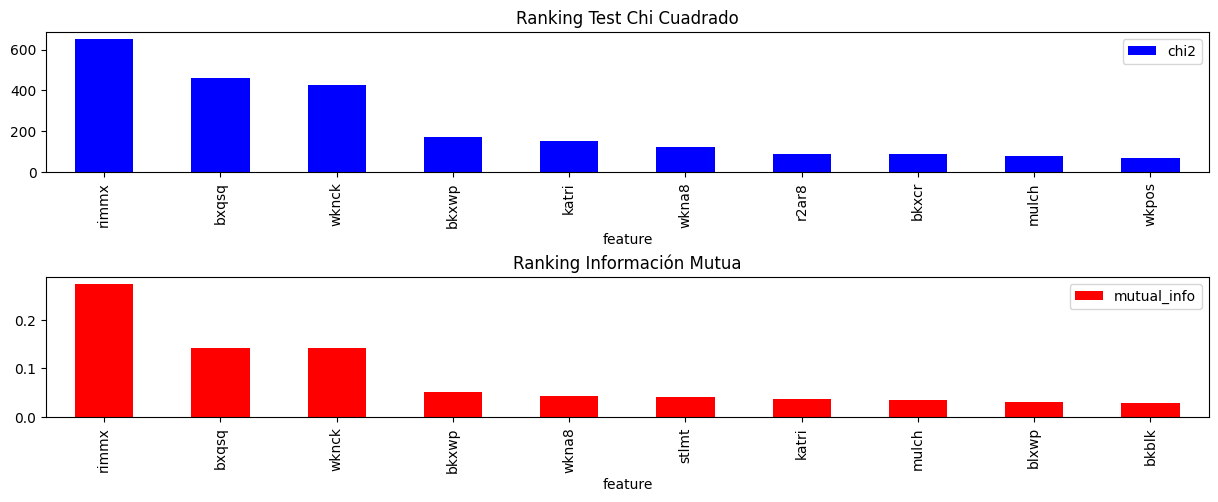

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(15, 5))
df_rank['chi2'].sort_values(ascending=False)\
    .head(10)\
    .plot.bar(ax=ax[0], title='Ranking Test Chi Cuadrado', legend=True, color='blue')
df_rank['mutual_info'].sort_values(ascending=False)\
    .head(10)\
    .plot.bar(ax=ax[1], title='Ranking Información Mutua', legend=True, color='red')
plt.subplots_adjust(hspace=.75)
plt.show()

# Conclusiones <a class="anchor" id="conclusiones"></a>
1. Las variables de entrada son todas categóricas
2. El problema es de tipo clasificación
3. Para ambos tests estadísticos (Test Chi cuadrado e Información Mútua) las tres mejores características son:
    1. **TOP 1**: rimmx
    2. **TOP 2**: bxqsq
    3. **TOP 3**: wknck
4. A partir de la característica número 4, los resultados son diferentes dependiendo del test estadístico aplicado, siendo:

| TOP | Test Chi Cuadrado | Información Mútua |
|:---:|:---:|:---:|
| **4** | bkxwp | wkna8 |
| **5** | katri | bkxwp |
| **6** | wkna8 | katri |
| **7** | r2ar8 | r2ar8 |
| **8** | bkxcr | mulch |
| **9** | mulch | wkpos |
| **10** | wkpos | bkxcr |